# Examen de Simulacion
## Nombre Edison Huñaizaca
•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].
•	Title: Titulo del Post/Twitter
•	Word count: la cantidad de palabras del artículo,
•	# of Links: los enlaces externos que contiene,
•	# of comments: cantidad de comentarios,
•	# Shares: compartidos.
•	HashTag
•	Etc.

En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter  utilizando regresión [2].

•	Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:
◦	Tomar los resultados de la regresión para la selección del candidato.
◦	Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.
◦	Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.
◦	Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
◦	Las personas solo tiene un recinto electoral para realizar el proceso.
◦	Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
◦	La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
◦	Realiza el voto en un tiempo aleatorio de un partido especifico.
◦	La persona recibe su certificado votación.
◦	La persona sale del recinto electoral.
◦	Finalmente generar una grafica de las personas que votaron y los asambleístas electos.
•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
◦	Se debe establecer un modelo basado en modelos matemáticos y probabilísticos para la predicción del numero de veces que se compartirá o la tendencia electoral basada en redes sociales.
◦	El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias de votaciones.
◦	Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
▪	Total de de personas que realizaron el proceso de votación.
▪	Asambleístas ganadores.
▪	El tiempo promedio de espera.
## Desarrollo :
Para el desarollo de este travajo se debe primero instalar la libreria tweepy:

In [2]:
!pip install tweepy

luego se prosede a la extraccion de los datos de tweeter en espesial los tewets,el numero de compartidos ,el numero de retweets para poder luego ser analisados

,Tweets
0,RT @cnegobec: IMPORTANTE | Consejo Nacional El...
1,RT @LuisVerdesotoo1: Los invito a leer la entr...
2,#CNEInforma | Bajo medidas de bioseguridad cap...
3,RT @LuisVerdesotoo1: El Protocolo para la Prev...
4,[VIDEO] ▶️ Cinco organizaciones sociales y tre...
5,RT @cnegobec: BOLETÍN | CNE convoca al Cuarto ...
6,[BOLETÍN] 🗞️ Cinco organizaciones sociales y t...
7,RT @complicefm: Dialogamos en #MásNoticias con...
8,RT @DianaAtamaint: Lamento profundamente el fa...
9,RT @cnegobec: ¡Excelente sábado! Te invitamos ...


,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs
0,RT @cnegobec: IMPORTANTE | Consejo Nacional El...,123,1340739203215347713,2020-12-20 19:21:50,Twitter for Android,0,98
1,RT @LuisVerdesotoo1: Los invito a leer la entr...,140,1340644995896905729,2020-12-20 13:07:29,Twitter for Android,0,6
2,#CNEInforma | Bajo medidas de bioseguridad cap...,140,1340644936203513856,2020-12-20 13:07:15,Twitter for Android,2,1
3,RT @LuisVerdesotoo1: El Protocolo para la Prev...,140,1340492490282045441,2020-12-20 03:01:29,Twitter for Android,0,29
4,[VIDEO] ▶️ Cinco organizaciones sociales y tre...,121,1340412332195930115,2020-12-19 21:42:58,Twitter for Android,2,4
...,...,...,...,...,...,...,...
95,#CNEInforma | En Azuay se seleccionaron 13.559...,140,1339318790820081672,2020-12-16 21:17:37,Twitter Web App,0,0
96,RT @CCInoticias: En Azuay organizaciones polít...,140,1339306906150690817,2020-12-16 20:30:24,Twitter Web App,0,2
97,RT @CCInoticias: Se registra la primera organi...,140,1339306813586550784,2020-12-16 20:30:02,Twitter Web App,0,1
98,"RT @elmercurioec: Esta manaña, representantes ...",139,1339305492473147400,2020-12-16 20:24:47,Twitter Web App,0,4


La longitud media de los tweets: 139.07
Creación de fuentes de contenido:
* Twitter for Android
* Twitter Web App
* TweetDeck


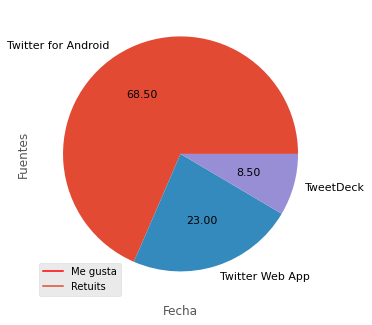

In [2]:
#importacion de libreias nesesarias para laextracion de datos
import tweepy
# General:
import tweepy           # Para consumir la API de Tweeter
import pandas as pd     # Para análisis de datos
import numpy as np      # Para cálculo numérico

# Para visualización con gráficos:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importacion de las libreias nesesarias para la regresion
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

    # Esto nos permite usar las claves como variables

# Configuración de la API:
def twitter_setup():

    CONSUMER_KEY = "g1HDaYrJEggedusIjh6DNrl"
    CONSUMER_SECRET = "YoLCBkB2aZ3kCUgr0Riv1eboB2UwVbONbTE1AJdh3kOWA"
    ACCESS_TOKEN =  "1302131015671809-ToiX7JewQWr8DhXsQYrAEwNfWvzkGI"
    ACCESS_SECRET = "69XYnUCo4RYRHeh3bK9pBk828d3vZhh4hYhtNLS"
    
    
    # Autenticación y acceso usando claves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Retornar API con autenticación:
    api = tweepy.API(auth)
    return api
	
# Creamos un objeto extractor:
extractor = twitter_setup()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="@CNEAzuay", count=1000)
# Creamos una dataframe de pandas:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']);

# Dibujamos los 10 primeros elementos del dataframe:
display(data.head(10))

# Añadimos los datos relevantes:
data['longitud']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Fecha'] = np.array([tweet.created_at for tweet in tweets])
data['Fuente'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Mostramos los n primeros elementos del dataframe:
display(data.head(100))

# Sacamos la media de las longitudes:
mean = np.mean(data['longitud'])

print("La longitud media de los tweets: {}".format(mean))

# Sacamos el tweet con más "Me gusta" y el más retuiteado:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Creamos las series temporales de datos de los tweets:

tlen = pd.Series(data=data['longitud'].values, index=data['Fecha'])
tfav = pd.Series(data=data['Likes'].values, index=data['Fecha'])
tret = pd.Series(data=data['RTs'].values, index=data['Fecha'])

# Variación de las longitudes de tweets con el tiempo:
tlen.plot(figsize=(16,4), color='r');

# Visualización de Me gusta vs Retuits:
tfav.plot(figsize=(16,4), label="Me gusta", legend=True)
tret.plot(figsize=(16,4), label="Retuits", legend=True);

# Obtener todas las fuentes posibles:
fuentes = []
for fuente in data['Fuente']:
    if fuente not in fuentes:
        fuentes.append(fuente)

# Imprimir la lista de fuentes:
print("Creación de fuentes de contenido:")
for fuente in fuentes:
    print("* {}".format(fuente))
	
# Creamos un vector numpy mapeado a las etiquetas:
percent = np.zeros(len(fuentes))

for fuente in data['Fuente']:
    for indice in range(len(fuentes)):
        if fuente == fuentes[indice]:
            percent[indice] += 1
            pass

percent /= 100

# Gráfico de tarta:
tarta = pd.Series(percent, index=fuentes, name='Fuentes')
tarta.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

Primero comprovamos cuantos datos emos extraido

In [3]:
data.shape

(200, 7)

luego se prosede a graficar los datos

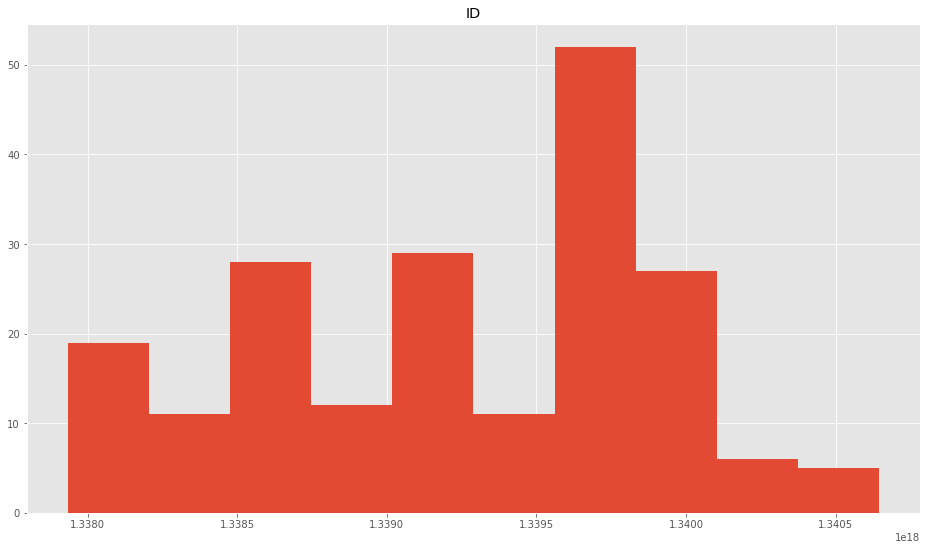

In [5]:
data.drop(['longitud','Likes', 'RTs'],1).hist()
plt.show()

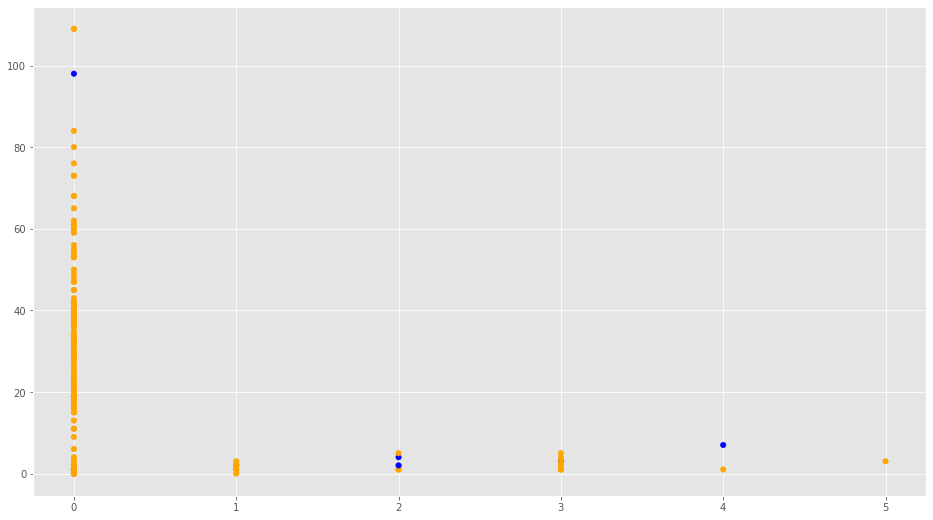

In [16]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Likes'].values
f2 = data['RTs'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['longitud']>130):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

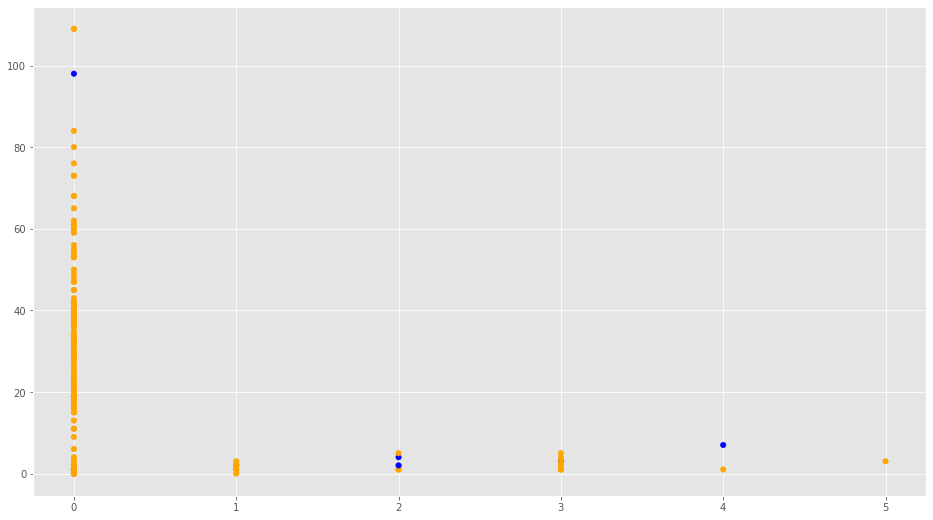

In [17]:
filtered_data = data[(data['Likes'] <= 3500) & (data['RTs'] <= 80000)]

f1 = filtered_data['Likes'].values
f2 = filtered_data['RTs'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['longitud']>130):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Luego de la filtracion de la informacion podemos apresiaor la nueba informaicion

In [18]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,longitud,ID,Likes,RTs
count,200.000000,2.000000e+02,200.000000,200.000000
mean,139.070000,1.339250e+18,0.315000,25.430000
std,2.864634,6.658043e+14,0.859926,22.629307
min,121.000000,1.337947e+18,0.000000,0.000000
25%,139.000000,1.338662e+18,0.000000,2.750000
50%,140.000000,1.339305e+18,0.000000,23.000000
75%,140.000000,1.339752e+18,0.000000,38.000000
max,140.000000,1.340739e+18,5.000000,109.000000


In [19]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Likes"]]
X_train = np.array(dataX)
y_train = filtered_data['RTs'].values

Secalculan los valores de error coeficiente para asi poder crear la reccta en base alos tewets y los retwet que tiene

In [20]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-9.77941626]
Independent term: 
 28.510516122455915
Mean squared error: 439.16
Variance score: 0.14


Grafica dela regresion lineal

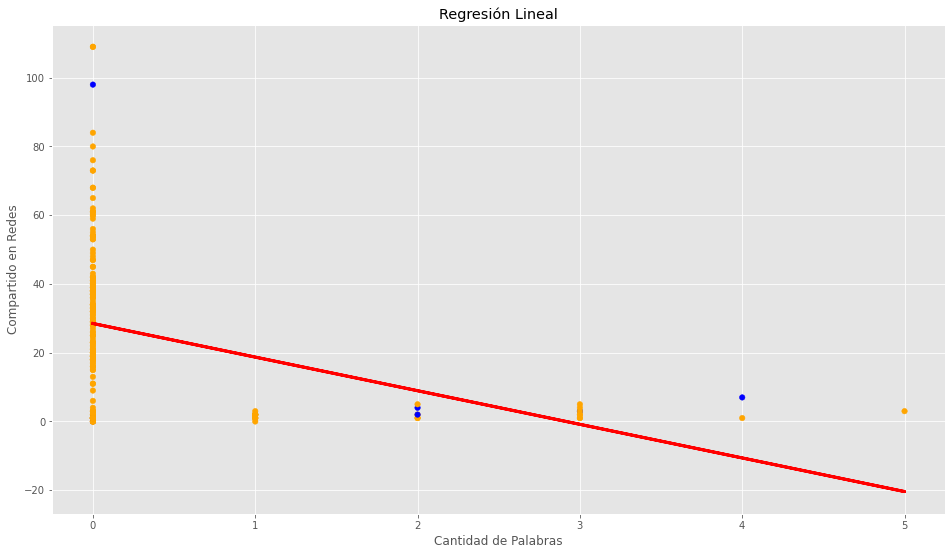

In [21]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [ ]:
Luego se intenta ver la tendencia  por  palabras, según nuestro modelo, hacemos:

In [21]:
y_Dosmil = regr.predict([[1]])
print(int(y_Dosmil))

18


## Conclucion
se puede desir que aun falta mas informacion debido a que las eleciones recien comiensa nose puede sacar muchos datos pero tambien se puede desir que la tendensia va en desenso y existe poco interes 
## Bibliografia
[1] https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
[2] https://www.youtube.com/watch?v=PUgPAM5Ect8
[3] https://realpython.com/twitter-bot-python-tweepy/
[4] https://twitter.com/CNEAzuay
